# Product Recommendation


## Import revelance library 

In [79]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn  as sns
import numpy as np
from sklearn.metrics import jaccard_score

### Loaded CSV DATA 
#### Data collected by student in class BADS 7205

In [80]:
recomment = pd.read_excel('./Customer Preference Survey.xlsx')  

## Exploratory  data
#### Show sample data 

In [81]:
recomment.head(10)

,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,2021-03-20 11:29:58.994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-20 11:33:10.114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-03-20 11:53:44.586,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
3,2021-03-20 11:54:00.984,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
4,2021-03-20 11:54:05.084,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
5,2021-03-20 11:54:12.558,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
6,2021-03-20 11:54:18.477,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
7,2021-03-20 11:54:20.911,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,NaN,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
8,2021-03-20 11:54:33.800,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
9,2021-03-20 11:54:40.338,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย


## Data Cleansing 

In [82]:
recomment.shape

(48, 62)

In [83]:
recomment.columns #เครื่องย่อยเศษอาหาร

Index(['ประทับเวลา', 'จักรยานเสือภูเขา', 'คอลลาเจน', 'Brownie อวกาศ', 'แม่โขง',
       'Botox', 'กัญชา', 'กัญชง', 'เครื่องวัดความดัน', 'หลอดไฟเปลี่ยนสีได้',
       'คอร์ส bikini wax', 'เก้าอี้นวดไฟฟ้า', 'ต้นไม้ประดับห้อง', 'หมอนข้าง',
       'ตาชั่ง ', 'คอร์สโบท็อกกราม', 'แสงโสม', 'กะหรี่(ปั๊บ)', 'Lego',
       'แฟน ที่แปลว่าพัดลม', 'ยาดอง', 'ชุดนอนไม่ได้นอน',
       'ที่ยกน้ำหนัก (Dumbell)', 'เครื่องดูดฝุ่นอัตโนมัติ (robot)',
       'เนื้อวากิล', 'หมูแดดเดียว', 'drone', 'เครื่องย่อยเศษอาหาร',
       'เสื้อซีทรู', 'ไพ่ยิปซี', 'เนื้อย่าง', 'เครื่องทำลายเอกสาร', 'กระเป๋า',
       'ชาบู', 'Surfskate', 'Board game', 'เครื่องย่อยเศษอาหาร.1',
       'ชุดน้องหมา', 'Omakase', 'เม็ดมะม่วงหิมพานต์', 'ไฟอัจฉริยะ',
       'บัตตาเลี่ยนที่ตัดผม', 'ไดร์เป่าผม Dyson', 'แผ่นเสียง',
       'กรรไกรตัดขนจมูก', 'PS5', 'เครื่องตรวจน้ำตาลในเลือด', 'โรตี', 'กะปิดอง',
       'น้องหมา', 'แพ็คเกจไทยเที่ยวไทย', 'เกมส์ FIFA Online', 'มะม่วงเบา',
       'ห้องน้ำแมวอัตโนมัติ', 'กระเป๋า chanel', 'ข้าวขาหมูคากิคาจักออ

In [84]:
for i in recomment :
    if 'เครื่องย่อยเศษอาหาร' in i :
        print(i)

เครื่องย่อยเศษอาหาร
เครื่องย่อยเศษอาหาร.1


Removed missing valued and duplicated columns value

In [85]:
recomment = recomment.drop([0,1])
missing = recomment.isnull().sum() 
dd = pd.DataFrame(missing,columns = {'NUm'})
dd[dd.NUm > 0]

,NUm
หมูแดดเดียว,1
เครื่องย่อยเศษอาหาร.1,1
เครื่องตรวจน้ำตาลในเลือด,1
แพ็คเกจไทยเที่ยวไทย,1
กระเป๋า chanel,1
ถั่งเช่า,1


In [86]:
recomment1 = recomment.copy()

In [87]:
missing = recomment1.isnull().sum() 
dd = pd.DataFrame(missing,columns = {'NUm'})
dd[dd.NUm > 0]

,NUm
หมูแดดเดียว,1
เครื่องย่อยเศษอาหาร.1,1
เครื่องตรวจน้ำตาลในเลือด,1
แพ็คเกจไทยเที่ยวไทย,1
กระเป๋า chanel,1
ถั่งเช่า,1


### Encoding value & Missing value handling  

In [88]:
recomment1 = recomment1.replace('เคย',1)
recomment1 = recomment1.replace('ไม่เคย',0)
recomment1['Transaction_id'] = [i for i in range(1,(recomment.shape[0]+1))]
recomment1[['หมูแดดเดียว','เครื่องย่อยเศษอาหาร.1','เครื่องตรวจน้ำตาลในเลือด','แพ็คเกจไทยเที่ยวไทย','กระเป๋า chanel','ถั่งเช่า']]=recomment1[['หมูแดดเดียว','เครื่องย่อยเศษอาหาร.1','เครื่องตรวจน้ำตาลในเลือด','แพ็คเกจไทยเที่ยวไทย','กระเป๋า chanel','ถั่งเช่า']].fillna(
     value= recomment1[['หมูแดดเดียว','เครื่องย่อยเศษอาหาร.1','เครื่องตรวจน้ำตาลในเลือด','แพ็คเกจไทยเที่ยวไทย','กระเป๋า chanel','ถั่งเช่า']].median())




### Removed duplicated column

In [89]:
#เครื่องย่อยเศษอาหาร.1
recomment1 =recomment1.drop(columns=['เครื่องย่อยเศษอาหาร.1'])

Show over all statistics

In [90]:
recomment1.describe().T.sort_values('mean',ascending = False)

,count,mean,std,min,25%,50%,75%,max
Transaction_id,46.0,23.500000,13.422618,1.0,12.25,23.5,34.75,46.0
ครีมกันแดด,46.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
กระเป๋า,46.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
ชาบู,46.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
โรตี,46.0,0.956522,0.206185,0.0,1.00,1.0,1.00,1.0
กะหรี่(ปั๊บ),46.0,0.934783,0.249637,0.0,1.00,1.0,1.00,1.0
เม็ดมะม่วงหิมพานต์,46.0,0.913043,0.284885,0.0,1.00,1.0,1.00,1.0
หมอนข้าง,46.0,0.869565,0.340503,0.0,1.00,1.0,1.00,1.0
หมูแดดเดียว,46.0,0.826087,0.383223,0.0,1.00,1.0,1.00,1.0
แฟน ที่แปลว่าพัดลม,46.0,0.804348,0.401085,0.0,1.00,1.0,1.00,1.0


In [91]:
recomment1.iloc[:,1].value_counts()

0    30
1    16
Name: จักรยานเสือภูเขา, dtype: int64

In [92]:
recomment1.head()

,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,...,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด,Transaction_id
2,2021-03-20 11:53:44.586,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,1,1,1,1
3,2021-03-20 11:54:00.984,0,1,0,1,0,0,0,1,0,...,0,0.0,0,1.0,1,0,1,0,1,2
4,2021-03-20 11:54:05.084,1,0,0,0,0,0,0,1,1,...,0,0.0,0,0.0,1,0,1,1,1,3
5,2021-03-20 11:54:12.558,0,0,0,1,0,1,0,0,0,...,0,0.0,0,0.0,0,0,0,0,1,4
6,2021-03-20 11:54:18.477,0,1,0,0,1,0,0,0,0,...,0,1.0,0,0.0,1,0,1,1,1,5


## Market Basket Analysis

### Association rule & Frequent Items set

find whole support score show the association of occurrent items 

In [93]:
frequent_itemsets = apriori(recomment1.iloc[:,1:-1], min_support=0.5, use_colnames=True)
frequent_itemsets.head(10)

,support,itemsets
0,0.543478,(คอลลาเจน)
1,0.717391,(ต้นไม้ประดับห้อง)
2,0.869565,(หมอนข้าง)
3,0.673913,(ตาชั่ง )
4,0.934783,(กะหรี่(ปั๊บ))
5,0.630435,(Lego)
6,0.804348,(แฟน ที่แปลว่าพัดลม)
7,0.608696,(ที่ยกน้ำหนัก (Dumbell))
8,0.543478,(เครื่องดูดฝุ่นอัตโนมัติ (robot))
9,0.673913,(เนื้อวากิล)


In [94]:
# eec = list(frequent_itemsets)
# print(eec[0])
#apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
frequent_itemsets['item_len'] = frequent_itemsets['itemsets'].apply(lambda x : len(x))#.sort_values(by= ['support'],ascending = False)
frequent_itemsets = frequent_itemsets.sort_values(by = ['support'],ascending = False)
frequent_itemsets.head(10)

,support,itemsets,item_len
12,1.000000,(กระเป๋า),1
137,1.000000,"(ชาบู, กระเป๋า)",2
631,1.000000,"(ครีมกันแดด, ชาบู, กระเป๋า)",3
143,1.000000,"(ครีมกันแดด, กระเป๋า)",2
19,1.000000,(ครีมกันแดด),1
149,1.000000,"(ครีมกันแดด, ชาบู)",2
13,1.000000,(ชาบู),1
160,0.956522,"(ครีมกันแดด, โรตี)",2
642,0.956522,"(ครีมกันแดด, โรตี, กระเป๋า)",3
140,0.956522,"(โรตี, กระเป๋า)",2


## Show top 10 frequent items set  2 items by support score

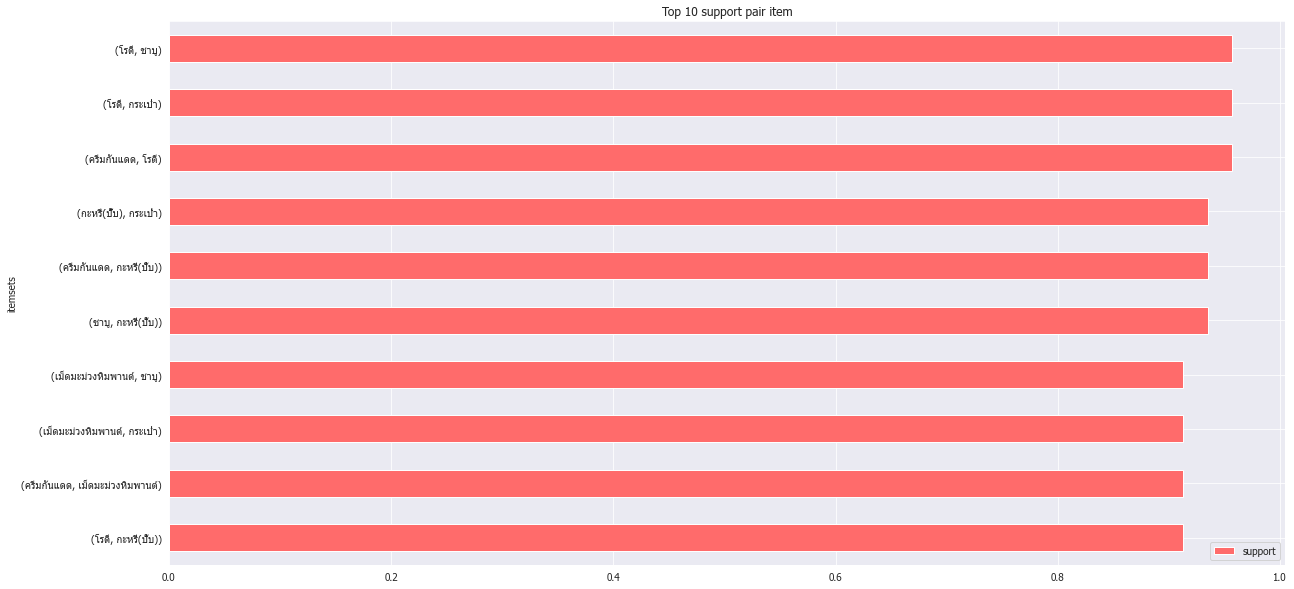

In [95]:
import matplotlib.font_manager as fm
import seaborn as sn
#plt.subplots(figsize=(20,18))
sn.set_style("darkgrid",{"font.sans-serif":['simhei', 'Tahoma']})
frequent_itemsets[(frequent_itemsets['item_len'] == 2) & 
                  ((frequent_itemsets['support'] > 0.9)  
                   )].sort_values(by=['support'], ascending= True).head(10).plot.barh(
                    x='itemsets',y='support',title = 'Top 10 support pair item' ,color = '#ff6b6b'
,figsize=(20,10))
plt.savefig('Top10_support.png',format = 'png',dpi = 150) 

In [96]:
frequent_2len = frequent_itemsets[frequent_itemsets['item_len'] == 2 ]
frequent_2len.head(10)

,support,itemsets,item_len
137,1.000000,"(ชาบู, กระเป๋า)",2
143,1.000000,"(ครีมกันแดด, กระเป๋า)",2
149,1.000000,"(ครีมกันแดด, ชาบู)",2
160,0.956522,"(ครีมกันแดด, โรตี)",2
140,0.956522,"(โรตี, กระเป๋า)",2
146,0.956522,"(โรตี, ชาบู)",2
75,0.934783,"(ชาบู, กะหรี่(ปั๊บ))",2
81,0.934783,"(ครีมกันแดด, กะหรี่(ปั๊บ))",2
74,0.934783,"(กะหรี่(ปั๊บ), กระเป๋า)",2
78,0.913043,"(โรตี, กะหรี่(ปั๊บ))",2


## Show top 10 frequent item set  3 items by support score

In [97]:
frequent_3len = frequent_itemsets[frequent_itemsets['item_len'] == 3 ]
frequent_3len.sort_values('support', ascending = False).head(10)

,support,itemsets,item_len
631,1.000000,"(ครีมกันแดด, ชาบู, กระเป๋า)",3
656,0.956522,"(ครีมกันแดด, โรตี, ชาบู)",3
628,0.956522,"(โรตี, ชาบู, กระเป๋า)",3
642,0.956522,"(ครีมกันแดด, โรตี, กระเป๋า)",3
428,0.934783,"(ชาบู, กะหรี่(ปั๊บ), กระเป๋า)",3
434,0.934783,"(ครีมกันแดด, กะหรี่(ปั๊บ), กระเป๋า)",3
440,0.934783,"(ครีมกันแดด, ชาบู, กะหรี่(ปั๊บ))",3
431,0.913043,"(โรตี, กะหรี่(ปั๊บ), กระเป๋า)",3
627,0.913043,"(เม็ดมะม่วงหิมพานต์, ชาบู, กระเป๋า)",3
437,0.913043,"(โรตี, ชาบู, กะหรี่(ปั๊บ))",3


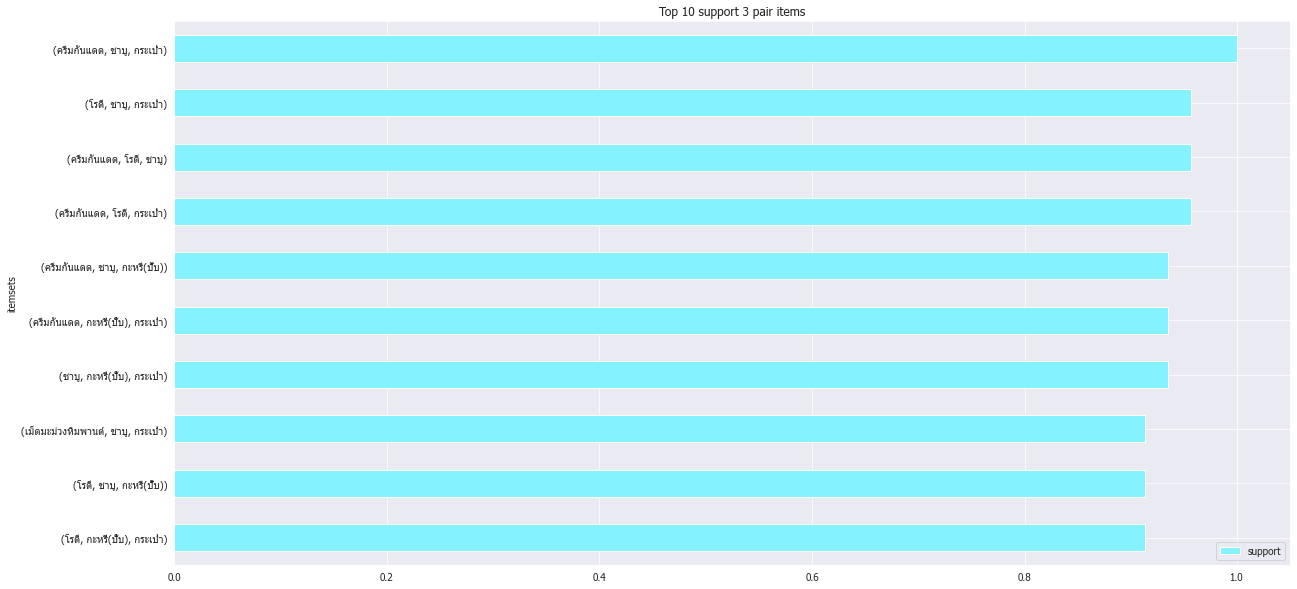

In [98]:
## Plot Top 10 Support Score with  3 itmes pair  
sn.set_style("darkgrid",{"font.sans-serif":['simhei', 'Tahoma']})
frequent_itemsets[(frequent_itemsets['item_len'] == 3) & 
                  ((frequent_itemsets['support'] > 0.9)  
                   )].sort_values(by=['support'], ascending= True).tail(10).plot.barh(
                    x='itemsets',y='support',title = 'Top 10 support 3 pair items',color= '#85f2ff'
,figsize=(20,10))
plt.savefig('Top10_support.png',format = 'png',dpi = 150)

In [99]:
# for item in frequent_itemsets:

#     # first index of the inner list
#     # Contains base item and add item
#     pair = item[0] 
#     print(pair)
# #     items = [x for x in pair]
# #     print("Rule: " + items[0] + " -> " + items[1])

# #     #second index of the inner list
# #     print("Support: " + str(item[1]))

# #     #third index of the list located at 0th
# #     #of the third index of the inner list

# #     print("Confidence: " + str(item[2][0][2]))
# #     print("Lift: " + str(item[2][0][3]))
# #     print("=====================================")

In [110]:
frequent_2len.head()

,support,itemsets,item_len
137,1.000000,"(ชาบู, กระเป๋า)",2
143,1.000000,"(ครีมกันแดด, กระเป๋า)",2
149,1.000000,"(ครีมกันแดด, ชาบู)",2
160,0.956522,"(ครีมกันแดด, โรตี)",2
140,0.956522,"(โรตี, กระเป๋า)",2


Running a market basket analysis. Here's the visualzation of 1-itemset association rules (filtered by Support > 0.5 and Lift > 1.05)
Nodes represent items and directed edges represent rules (antecedents ➞ consequents). Edge labels annotates Lift values. Note that for 1-to-1-itemset, both directions of rules (A➞B, B➞A) have the same lift values, so in the case, we always have bi-directional edges (A⬌B).

In [113]:
rules_1 = association_rules(frequent_itemsets, metric="lift", min_threshold= 1.01)
rules_1['antecedents'] = rules_1.antecedents.apply(lambda x : list(x)[-1])  
rules_1['consequents'] = rules_1.consequents.apply(lambda x : list(x)[-1]) 
rules_1['lift'] = rules_1.lift.apply(lambda x :  round(x,3))
rules_1.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,กระเป๋า,กะหรี่(ปั๊บ),0.956522,0.934783,0.913043,0.954545,1.021,0.018904,1.434783
1,กระเป๋า,โรตี,0.934783,0.956522,0.913043,0.976744,1.021,0.018904,1.869565
2,โรตี,กระเป๋า,0.956522,0.934783,0.913043,0.954545,1.021,0.018904,1.434783
3,กะหรี่(ปั๊บ),กระเป๋า,0.934783,0.956522,0.913043,0.976744,1.021,0.018904,1.869565
4,กระเป๋า,กะหรี่(ปั๊บ),0.956522,0.934783,0.913043,0.954545,1.021,0.018904,1.434783
5,กระเป๋า,โรตี,0.934783,0.956522,0.913043,0.976744,1.021,0.018904,1.869565
6,โรตี,กระเป๋า,0.956522,0.934783,0.913043,0.954545,1.021,0.018904,1.434783
7,กะหรี่(ปั๊บ),กระเป๋า,0.934783,0.956522,0.913043,0.976744,1.021,0.018904,1.869565
8,โรตี,กะหรี่(ปั๊บ),0.956522,0.934783,0.913043,0.954545,1.021,0.018904,1.434783
9,กะหรี่(ปั๊บ),โรตี,0.934783,0.956522,0.913043,0.976744,1.021,0.018904,1.869565


In [104]:
rules = association_rules(frequent_itemsets , metric="lift", min_threshold= 1.01)
rules['antecedents'] = rules.antecedents.apply(lambda x : set(x))  
rules['consequents'] = rules.consequents.apply(lambda x : set(x)) 
rules['lift'] = rules.lift.apply(lambda x :  round(x,3))
rules[ (rules.antecedents.apply(len)==2) & (rules.consequents.apply(len)==1)].sort_values('lift',ascending= False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
41424,"{เนื้อย่าง, หมูแดดเดียว}",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261
67530,"{Software ถูกลิขสิทธิ์, เนื้อย่าง}",{เนื้อวากิล},0.608696,0.673913,0.565217,0.928571,1.378,0.155009,4.565217
13806,"{โรตี, เนื้อวากิล}",{เนื้อย่าง},0.673913,0.717391,0.652174,0.967742,1.349,0.168715,8.760870
13808,"{โรตี, เนื้อย่าง}",{เนื้อวากิล},0.717391,0.673913,0.652174,0.909091,1.349,0.168715,3.586957
12524,"{กระเป๋า, เนื้อวากิล}",{เนื้อย่าง},0.673913,0.717391,0.652174,0.967742,1.349,0.168715,8.760870
12411,"{ครีมกันแดด, เนื้อวากิล}",{เนื้อย่าง},0.673913,0.717391,0.652174,0.967742,1.349,0.168715,8.760870
12410,"{ครีมกันแดด, เนื้อย่าง}",{เนื้อวากิล},0.717391,0.673913,0.652174,0.909091,1.349,0.168715,3.586957
12525,"{เนื้อย่าง, กระเป๋า}",{เนื้อวากิล},0.717391,0.673913,0.652174,0.909091,1.349,0.168715,3.586957
13572,"{เนื้อย่าง, ชาบู}",{เนื้อวากิล},0.717391,0.673913,0.652174,0.909091,1.349,0.168715,3.586957
13573,"{ชาบู, เนื้อวากิล}",{เนื้อย่าง},0.673913,0.717391,0.652174,0.967742,1.349,0.168715,8.760870


In [105]:
rules = association_rules(frequent_itemsets , metric="lift", min_threshold= 1.01)
rules['antecedents'] = rules.antecedents.apply(lambda x : set(x))  
rules['consequents'] = rules.consequents.apply(lambda x : set(x)) 
rules['lift'] = rules.lift.apply(lambda x :  round(x,3))
rules[ (rules.antecedents.apply(len)==3) & (rules.consequents.apply(len)==1)].sort_values('lift',ascending= False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
349478,"{Software ถูกลิขสิทธิ์, เนื้อย่าง, หมูแดดเดียว}",{เนื้อวากิล},0.521739,0.673913,0.500000,0.958333,1.422,0.148393,7.826087
52745,"{โรตี, หมูแดดเดียว, เนื้อย่าง}",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261
53066,"{ครีมกันแดด, เนื้อย่าง, หมูแดดเดียว}",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261
52784,"{เนื้อย่าง, หมูแดดเดียว, กระเป๋า}",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261
52770,"{เนื้อย่าง, ชาบู, หมูแดดเดียว}",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261
52756,"{เม็ดมะม่วงหิมพานต์, เนื้อย่าง, หมูแดดเดียว}",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261
64614,"{ครีมกันแดด, Software ถูกลิขสิทธิ์, เนื้อย่าง}",{เนื้อวากิล},0.608696,0.673913,0.565217,0.928571,1.378,0.155009,4.565217
73086,"{Software ถูกลิขสิทธิ์, เนื้อย่าง, กระเป๋า}",{เนื้อวากิล},0.608696,0.673913,0.565217,0.928571,1.378,0.155009,4.565217
64603,"{Software ถูกลิขสิทธิ์, โรตี, เนื้อย่าง}",{เนื้อวากิล},0.608696,0.673913,0.565217,0.928571,1.378,0.155009,4.565217
62056,"{เนื้อย่าง, กะหรี่(ปั๊บ), หมูแดดเดียว}",{เนื้อวากิล},0.608696,0.673913,0.565217,0.928571,1.378,0.155009,4.565217


In [106]:
rules = association_rules(frequent_itemsets , metric="lift", min_threshold= 1.01)
rules['antecedents'] = rules.antecedents.apply(lambda x : set(x))  
rules['consequents'] = rules.consequents.apply(lambda x : set(x)) 
rules['lift'] = rules.lift.apply(lambda x :  round(x,3))
rules[ (rules.antecedents.apply(len)==4) & (rules.consequents.apply(len)==1)].sort_values('lift',ascending= False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
316255,"{ครีมกันแดด, Software ถูกลิขสิทธิ์, เนื้อย่าง,...",{เนื้อวากิล},0.521739,0.673913,0.500000,0.958333,1.422,0.148393,7.826087
317063,"{เม็ดมะม่วงหิมพานต์, เนื้อย่าง, หมูแดดเดียว, S...",{เนื้อวากิล},0.521739,0.673913,0.500000,0.958333,1.422,0.148393,7.826087
317177,"{Software ถูกลิขสิทธิ์, เนื้อย่าง, หมูแดดเดียว...",{เนื้อวากิล},0.521739,0.673913,0.500000,0.958333,1.422,0.148393,7.826087
316307,"{Software ถูกลิขสิทธิ์, โรตี, หมูแดดเดียว, เนื...",{เนื้อวากิล},0.521739,0.673913,0.500000,0.958333,1.422,0.148393,7.826087
317105,"{Software ถูกลิขสิทธิ์, เนื้อย่าง, ชาบู, หมูแด...",{เนื้อวากิล},0.521739,0.673913,0.500000,0.958333,1.422,0.148393,7.826087
46206,"{เม็ดมะม่วงหิมพานต์, โรตี, หมูแดดเดียว, เนื้อย...",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261
46424,"{ครีมกันแดด, เนื้อย่าง, หมูแดดเดียว, กระเป๋า}",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261
46260,"{ครีมกันแดด, โรตี, หมูแดดเดียว, เนื้อย่าง}",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261
46686,"{เนื้อย่าง, ชาบู, หมูแดดเดียว, กระเป๋า}",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261
46236,"{ครีมกันแดด, เนื้อย่าง, ชาบู, หมูแดดเดียว}",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261


#### Highest lift score 

In [107]:
max(rules.lift)

1.469

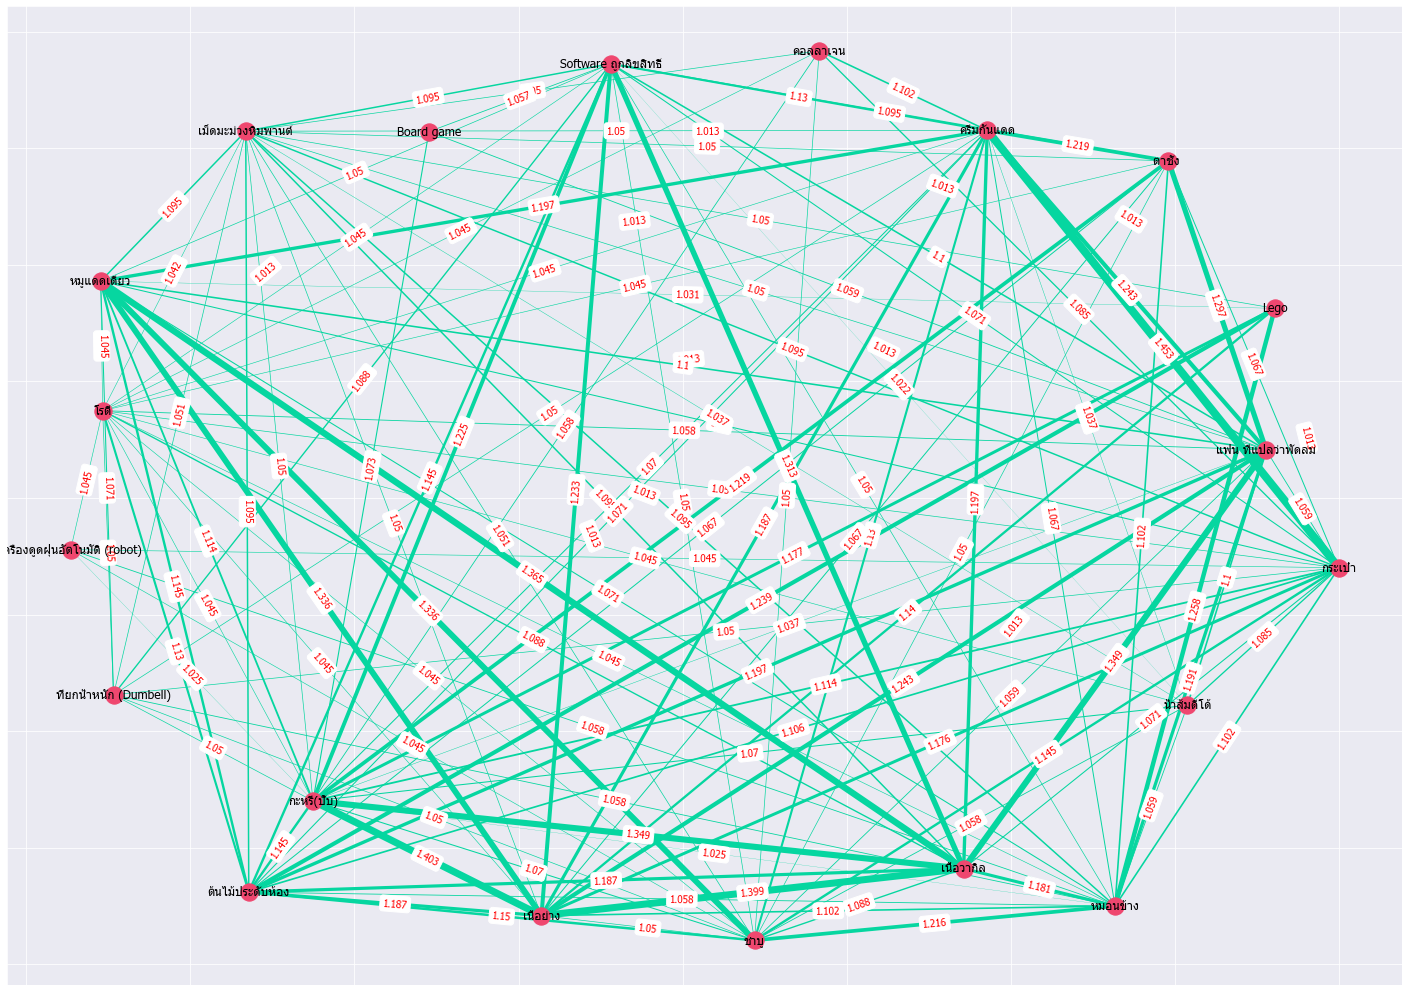

In [121]:
from matplotlib.pyplot import figure, text
import networkx as nx

fig, ax =plt.subplots(figsize=(25,18))
GA=nx.from_pandas_edgelist(rules_1,source='antecedents',target='consequents',edge_attr=['lift'])
#GA.nodes()
# nx.draw(GA,with_labels=True,node_color='orange')
# plt.show()
weight = [ float(i['lift'])*2 for i in dict(GA.edges).values()] 
weight = ((np.array(weight)- min(weight))/(max(weight)-min(weight)))*8
labels = [i for i in dict(GA.nodes)]
labels = {i:i for i in dict(GA.nodes).keys()}
#pos = nx.spring_layout(GA)
pos = nx.spring_layout(GA,weight='weight',  k=8)
nx.draw_networkx_nodes(GA, pos,ax = ax,node_color = '#EF476F')
nx.draw_networkx_edges(GA, pos,edge_color='#06D6A0',arrowsize=10, width=weight, ax=ax ) ##, labels=True)
edge_labels = nx.get_edge_attributes(GA, 'lift')
#edge_labels = nx.get_edge_attributes(G, 'lift')
nx.draw_networkx_edge_labels(GA, pos, edge_labels=edge_labels, font_color='red')#,  **labels_params)
_ = nx.draw_networkx_labels(GA, pos, labels, ax=ax)
plt.savefig('graph_item_1_1.png',format = 'png',dpi = 150) 


### Visualizing results

#### Support vs Confidence

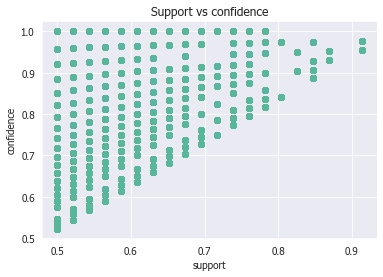

In [136]:
rules = rules.sort_values(['lift'],ascending = False)
#display(rules)

plt.scatter(rules['support'], rules['confidence'], alpha=0.5, color  = '#58b69b')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs confidence')
plt.plot(figsize=(50,50))
plt.savefig('Support_vs_confidence.png',format = 'png',dpi = 150) 

#### Support vs lift

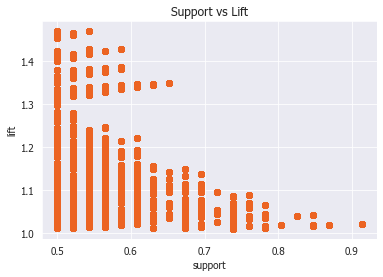

In [135]:
rules = rules.sort_values(['lift'],ascending = False)
#display(rules)
plt.scatter(rules['support'], rules['lift'], alpha=0.5, color = '#ed6423')
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.plot(figsize=(50,50))
plt.savefig('Support_vs_lift.png',format = 'png',dpi = 150) 

#### Lift vs Confidence

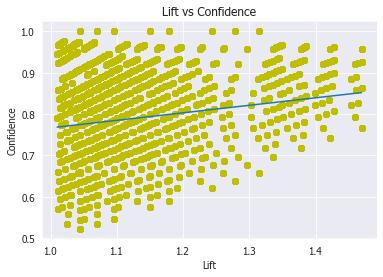

In [146]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift'])  )
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')
plt.plot(figsize=(30,30))
plt.savefig('lift_VS_confident.png',format = 'png',dpi = 150) 

In [147]:
fit_fn(rules['lift'])

array([0.85191353, 0.85191353, 0.85191353, ..., 0.7685634 , 0.7685634 ,
       0.7685634 ])

## Collaborative Filtering - Item Similarity

By using users' ratings for each item as its feature vector, calculates cosine similarity values for each pair of items. We could recommend items based on item similarity.
Filtering the similarity using 0.65 threshold, and visualize them in graph. A node represents an item. Edge thickness and color represent cosine similarity between 2 items.

In [148]:
item_item_matrix = pd.DataFrame(index=recomment1.columns,columns=recomment1.columns)
item_item_matrix1 = item_item_matrix.iloc[1:-1,1:-1]

In [151]:
recomment2 = recomment1.iloc[:,1:-1]
recomment2.head(10)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0.0,0,0,1,1,1
3,0,1,0,1,0,0,0,1,0,0,...,1,0,0.0,0,1.0,1,0,1,0,1
4,1,0,0,0,0,0,0,1,1,0,...,1,0,0.0,0,0.0,1,0,1,1,1
5,0,0,0,1,0,1,0,0,0,0,...,0,0,0.0,0,0.0,0,0,0,0,1
6,0,1,0,0,1,0,0,0,0,0,...,0,0,1.0,0,0.0,1,0,1,1,1
7,1,1,0,0,0,0,0,1,0,0,...,1,0,0.0,0,0.0,1,0,0,0,1
8,0,0,0,1,0,0,0,1,0,0,...,1,0,0.0,0,0.0,1,0,1,1,1
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0.0,0,0.0,0,0,0,0,1
10,0,0,0,0,0,1,0,1,0,0,...,0,0,0.0,1,1.0,0,0,0,1,1
11,0,1,0,0,0,0,0,1,0,0,...,1,0,0.0,0,0.0,0,0,0,1,1


### Create matrix finding similarity 

Matrix showing a similarity item by cosine similarity score with the item that has item rating on each user. the highest similarity scores are 1 when items A and B rating by the whole user .Otherwise 
similarity score has decreased by cosine distance .

In [152]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix1.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix1.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix1.iloc[i,j] =  1-cosine(recomment2.iloc[:,i],recomment2.iloc[:,j])

In [153]:
item_item_matrix1.head(10)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
จักรยานเสือภูเขา,1,0.55,0.33541,0.400892,0.416667,0.265165,0.25,0.458831,0.452267,0.125,...,0.471405,0.433013,0.33541,0.306186,0.0883883,0.471405,0.375,0.456435,0.583333,0.589768
คอลลาเจน,0.55,1,0.268328,0.320713,0.533333,0.141421,0.2,0.458831,0.361814,0.4,...,0.565685,0.34641,0.357771,0.244949,0.282843,0.612826,0.4,0.657267,0.7,0.73721
Brownie อวกาศ,0.33541,0.268328,1,0.478091,0.447214,0.632456,0.67082,0.102598,0.13484,0.223607,...,0.210819,0.516398,0.8,0.547723,0.158114,0.316228,0.447214,0.244949,0.372678,0.32969
แม่โขง,0.400892,0.320713,0.478091,1,0.267261,0.566947,0.400892,0.367884,0.241747,0.133631,...,0.377964,0.46291,0.358569,0.218218,0.188982,0.440959,0.267261,0.39036,0.400892,0.551677
Botox,0.416667,0.533333,0.447214,0.267261,1,0.235702,0.333333,0.229416,0.301511,0.166667,...,0.235702,0.19245,0.596285,0.408248,0.117851,0.392837,0.166667,0.30429,0.5,0.442326
กัญชา,0.265165,0.141421,0.632456,0.566947,0.235702,1,0.53033,0.324443,0,0,...,0.0833333,0.408248,0.474342,0.433013,0.125,0.166667,0.353553,0.193649,0.353553,0.417029
กัญชง,0.25,0.2,0.67082,0.400892,0.333333,0.53033,1,0.114708,0.150756,0,...,0.235702,0.288675,0.447214,0.408248,0,0.117851,0.25,0.182574,0.333333,0.294884
เครื่องวัดความดัน,0.458831,0.458831,0.102598,0.367884,0.229416,0.324443,0.114708,1,0.415029,0.114708,...,0.43259,0.132453,0.102598,0.280976,0.324443,0.378517,0.229416,0.460739,0.573539,0.642685
หลอดไฟเปลี่ยนสีได้,0.452267,0.361814,0.13484,0.241747,0.301511,0,0.150756,0.415029,1,0.301511,...,0.284268,0,0.13484,0.246183,0.213201,0.355335,0.301511,0.495434,0.552771,0.48901
คอร์ส bikini wax,0.125,0.4,0.223607,0.133631,0.166667,0,0,0.114708,0.301511,1,...,0.353553,0,0.223607,0.408248,0.353553,0.471405,0.25,0.365148,0.25,0.294884


In [155]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [156]:
links['value'] = links.value.apply( lambda x :  round(x,3))
links.head(10)

,item,related item,value
0,จักรยานเสือภูเขา,จักรยานเสือภูเขา,1.000
1,จักรยานเสือภูเขา,คอลลาเจน,0.550
2,จักรยานเสือภูเขา,Brownie อวกาศ,0.335
3,จักรยานเสือภูเขา,แม่โขง,0.401
4,จักรยานเสือภูเขา,Botox,0.417
5,จักรยานเสือภูเขา,กัญชา,0.265
6,จักรยานเสือภูเขา,กัญชง,0.250
7,จักรยานเสือภูเขา,เครื่องวัดความดัน,0.459
8,จักรยานเสือภูเขา,หลอดไฟเปลี่ยนสีได้,0.452
9,จักรยานเสือภูเขา,คอร์ส bikini wax,0.125


In [157]:
links= links.loc[(links['item'] !=links['related item'])].sort_values('value',ascending = False)
links.shape

(3540, 3)

In [158]:
links_filtered=links.loc[  
                         (links['item'] != links['related item'])& (links['value'] > 0.75) ]
links_filtered.shape

(230, 3)

In [159]:
links_filtered.sort_values(by = ['value'], ascending = False).head(10)

,item,related item,value
1892,กระเป๋า,ชาบู,1.000
1919,กระเป๋า,ครีมกันแดด,1.000
1979,ชาบู,ครีมกันแดด,1.000
3571,ครีมกันแดด,กระเป๋า,1.000
1951,ชาบู,กระเป๋า,1.000
3572,ครีมกันแดด,ชาบู,1.000
2759,โรตี,ครีมกันแดด,0.978
2732,โรตี,ชาบู,0.978
1965,ชาบู,โรตี,0.978
1905,กระเป๋า,โรตี,0.978


## Graph network show the relationship on each pair of items by similarity score
We could recommend items based on item similarity.
Filtering the similarity using 0.75 threshold, and visualize them in graph. A node represents an item. Edge thickness and color represent cosine similarity between 2 items.

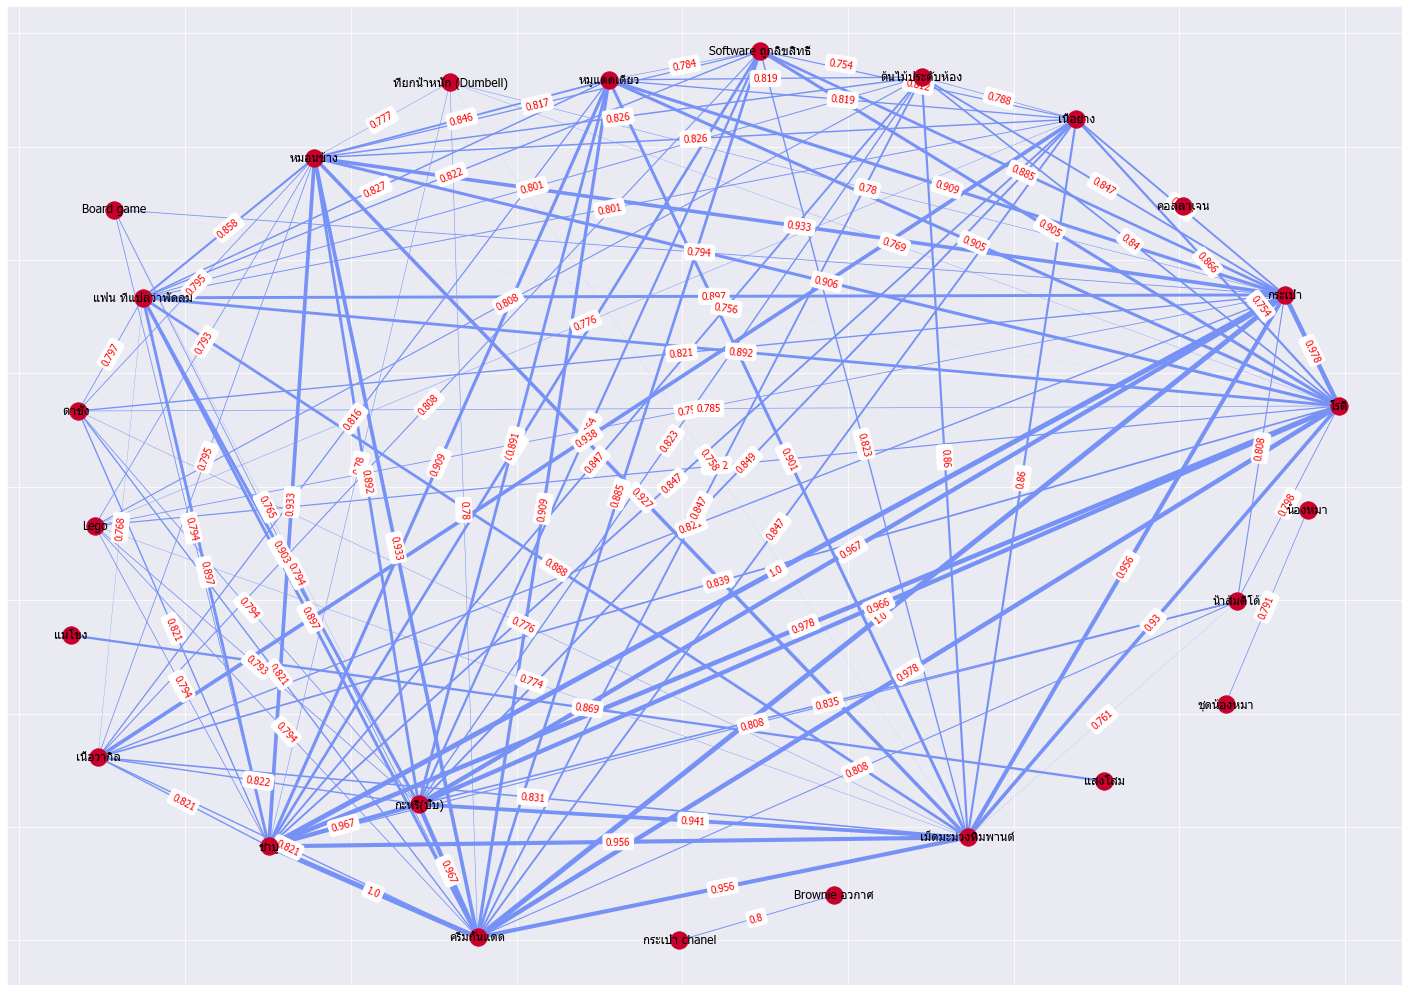

In [181]:
fig, ax =plt.subplots(figsize=(25,18))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item',edge_attr=['value'])
#GA.nodes()
# nx.draw(GA,with_labels=True,node_color='orange')
# plt.show()
weight2 = [ float(i['value']) for i in dict(GA.edges).values()] 
weight2 = ((np.array(weight2)- min(weight2))/(max(weight2)-min(weight2)))*5
labels2 = [i for i in dict(GA.nodes)]
labels2 = {i:i for i in dict(GA.nodes).keys()}
#pos = nx.spring_layout(GA)
pos = nx.spring_layout(GA,weight='weight2',  k=12)
nx.draw_networkx_nodes(GA, pos,ax = ax,node_color = '#ca002c') # #e636e1 ##f9c3ff
nx.draw_networkx_edges(GA, pos,edge_color='#7692f6',arrowsize=10, width=weight2, ax=ax ) ##, labels=True)
edge_labels = nx.get_edge_attributes(GA, 'value')
#edge_labels = nx.get_edge_attributes(G, 'lift')
nx.draw_networkx_edge_labels(GA, pos, edge_labels=edge_labels, font_color='red')#,  **labels_params)
_ = nx.draw_networkx_labels(GA, pos, labels2, ax=ax)
plt.savefig('collaborative.png',format = 'png',dpi = 150) 